In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  #Importing the libraries

In [56]:
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
fulfilment_center = pd.read_csv('fulfilment_center_info.csv')   #Uploading the datasets downloaded from kaggle
meal_info = pd.read_csv('meal_info.csv')

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [59]:
test.head() # checking the field present

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [60]:
fulfilment_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [61]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [62]:
  meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [63]:
train = pd.merge(train,fulfilment_center, on='center_id')
test = pd.merge(test,fulfilment_center, on='center_id')

train = pd.merge(train,meal_info, on='meal_id')
test = pd.merge(test,meal_info, on='meal_id')

In [64]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
dtypes: float64(3), int64(9), object(3)
memory usage: 55.7+ MB


In [66]:
train.isnull().sum() # counting the number of null values in the data. We found that the data had no null values.

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [67]:
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

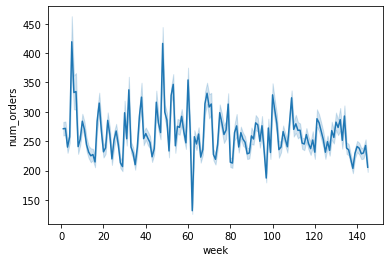

In [68]:
sns.lineplot(train['week'],train['num_orders']) # plotting a line graph of the columns of th edataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

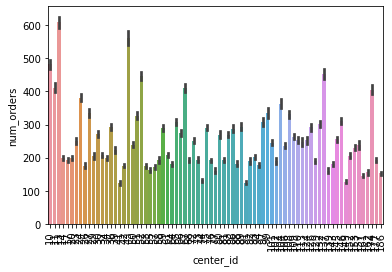

In [69]:
sns.barplot(train['center_id'],train['num_orders'])
plt.xticks(rotation=90)   # plotting bar graph of th ecolumns. We are visualizing the trends of th edatset throgh plots

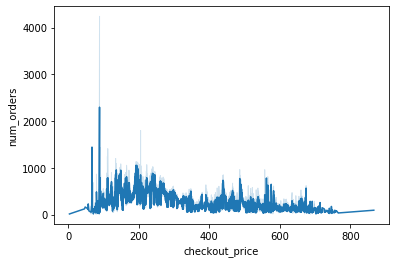

In [18]:
sns.lineplot(train['checkout_price'],train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

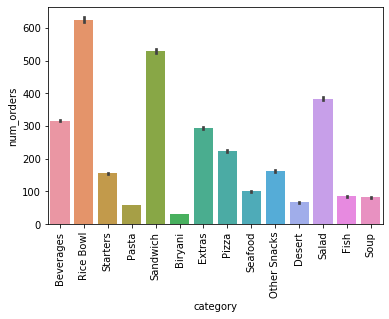

In [19]:
sns.barplot(train['category'],train['num_orders'])
plt.xticks(rotation = '90')

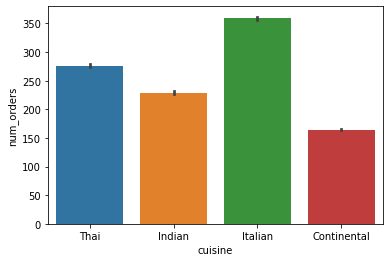

In [20]:
sns.barplot(train['cuisine'],train['num_orders'])
#plt.xticks(rotation = '90')

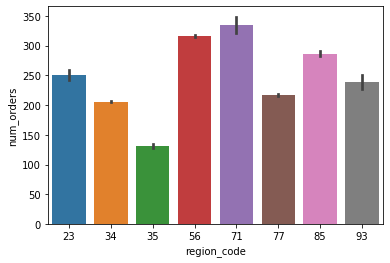

In [21]:
sns.barplot(train['region_code'],train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

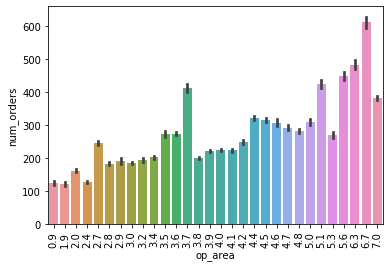

In [22]:
sns.barplot(train['op_area'],train['num_orders'])
plt.xticks(rotation = '90')

(array([400., 450., 500., 550., 600., 650., 700., 750.]),
 <a list of 8 Text xticklabel objects>)

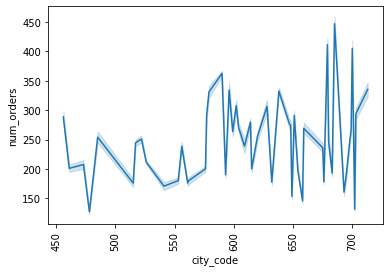

In [23]:
sns.lineplot(train['city_code'],train['num_orders'])
plt.xticks(rotation = '90')

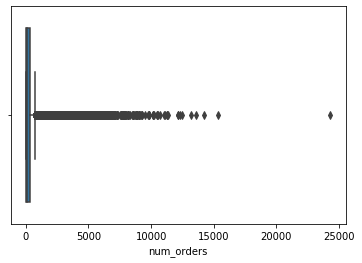

In [24]:
sns.boxplot(x='num_orders',data=train) # we are plotting a boxplot of the number of orders 

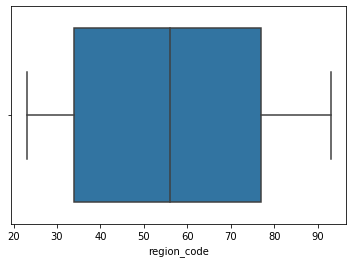

In [25]:
sns.boxplot(x='region_code',data=train)

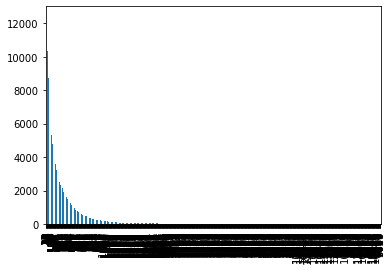

In [27]:
train['num_orders'].value_counts().plot(kind='bar')

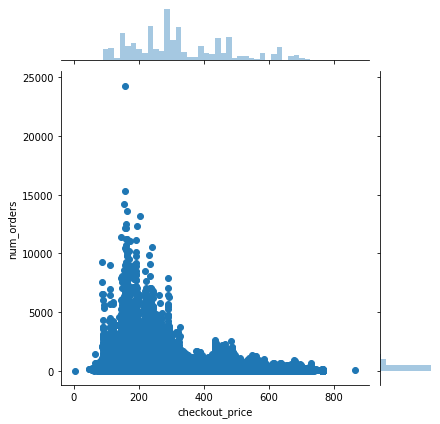

In [28]:
 sns.jointplot(x='checkout_price',y='num_orders',data=train) # we have also done jointplots to find the outlier points

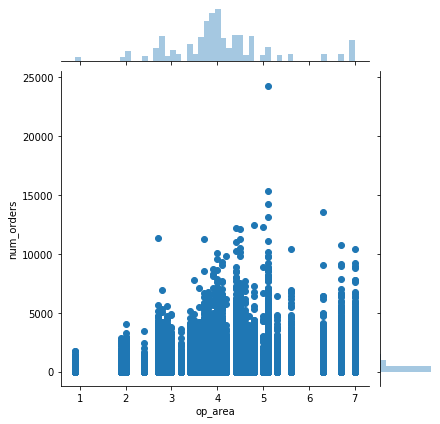

In [29]:
sns.jointplot(x='op_area',y='num_orders',data=train)

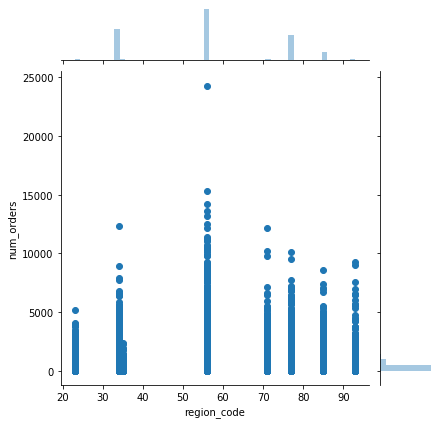

In [30]:
sns.jointplot(x='region_code',y='num_orders',data=train)

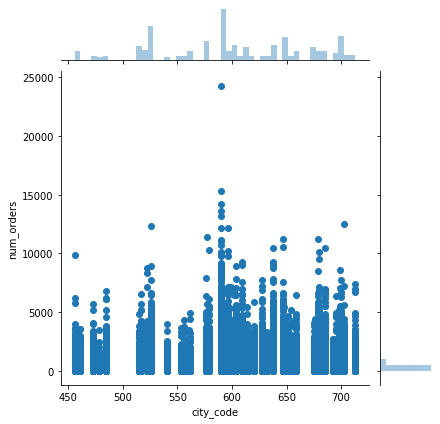

In [31]:
sns.jointplot(x='city_code',y='num_orders',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

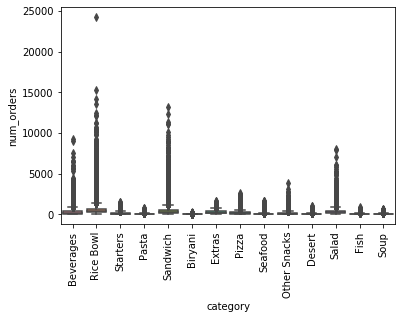

In [32]:
sns.boxplot(x='category',y='num_orders',data=train)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

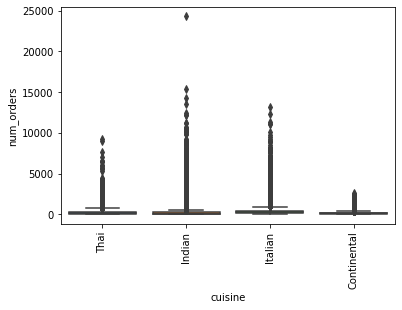

In [33]:
sns.boxplot(x='cuisine',y='num_orders',data=train)
plt.xticks(rotation=90)

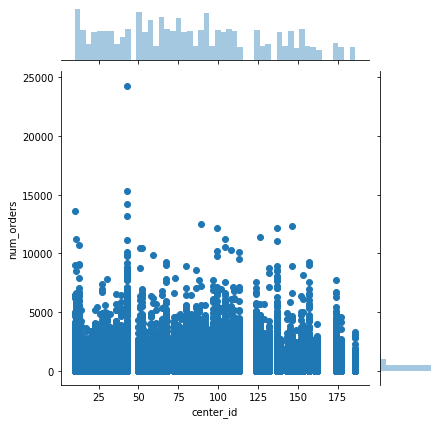

In [34]:
sns.jointplot(x='center_id',y='num_orders',data=train)

In [17]:
print("Total number of centers : ",train['center_id'].nunique())

Total number of centers :  77


In [18]:
print("Total Number of cities: ",train['city_code'].nunique())

Total Number of cities:  51


In [19]:
print("Total Number of operational areas: ",train['op_area'].nunique())

Total Number of operational areas:  30


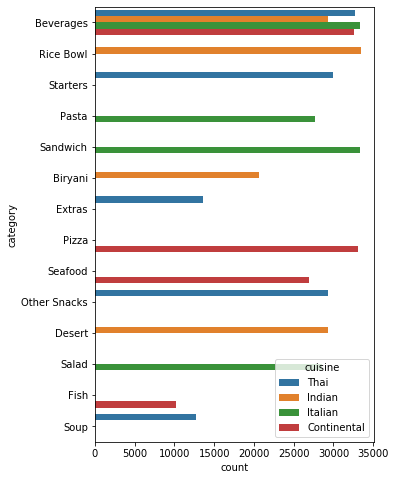

In [20]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = train['category'], hue = train['cuisine'], ax=ax)
plt.show()

In [70]:
center_meal_train = (train['center_id'].astype(str) + "_" + train['meal_id'].astype(str)).unique()
print("There are", len(center_meal_train),"center-meal pairs in train data")
center_meal_test = (test['center_id'].astype(str) + "_" + test['meal_id'].astype(str)).unique()
print("There are", len(center_meal_test),"center-meal pairs in train data")
print("There are",len(set(center_meal_test) - set(center_meal_train)),"New center-meal pairs in test dataset which are not present in train dataset")
print(set(center_meal_test) - set(center_meal_train))

There are 3597 center-meal pairs in train data
There are 3548 center-meal pairs in train data
There are 3 New center-meal pairs in test dataset which are not present in train dataset
{'73_1571', '73_2956', '92_2104'}


In [71]:
test[(test['center_id']==73) & (test['meal_id'].isin([2956, 1571]))].shape[0]

11

In [72]:
test[(test['center_id']==92) & (test['meal_id'].isin([2104]))].shape[0]

2

In [73]:
outlier_index = train[(train['num_orders']>15000)].index
train.drop(outlier_index,inplace = True)    # we are dropping the outlier points to get a clean dataset

In [74]:
train['train_or_test'] = 'train'
test['train_or_test'] = 'test'

In [75]:
total_data = train.append(test).reset_index(drop=True)[train.columns]

C:\anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [76]:
total_data = total_data.sort_values(['center_id', 'meal_id', 'week']).reset_index(drop=True)

In [77]:
total_data['checkout_price'] = np.log1p(total_data['checkout_price'])
total_data['base_price'] = np.log1p(total_data['base_price'])
total_data['discount_on_base'] = (total_data['base_price'] - total_data['checkout_price']) / total_data['base_price']
total_data["discount_ratio"] = total_data["base_price"] / total_data["checkout_price"]


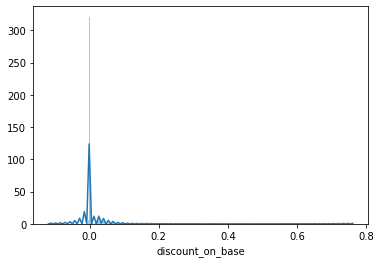

In [29]:
sns.distplot(total_data['discount_on_base'], bins=500)
plt.show()

In [78]:
total_data['price_last_curr_diff'] = (total_data['checkout_price'].shift(1) - total_data['checkout_price']).fillna(1)/ total_data['checkout_price'].shift(1).fillna(1)

In [79]:
for _, r in total_data.groupby(['center_id', 'meal_id'])['week'].first().reset_index().iterrows():
    total_data.loc[(total_data['center_id']==r['center_id']) & (total_data['meal_id']==r['meal_id']) & (total_data['week']==r['week']), 'price_last_curr_diff'] = total_data[(total_data['center_id']==r['center_id']) & (total_data['meal_id']==r['meal_id']) & (total_data['week']!=r['week'])]['price_last_curr_diff'].mean()
total_data['price_last_curr_diff'] = total_data['price_last_curr_diff'].fillna(0)

In [80]:
total_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,train_or_test,discount_on_base,discount_ratio,price_last_curr_diff
0,1436842,1,10,1062,5.206147,5.206147,0,0,865.0,590,56,TYPE_B,6.3,Beverages,Italian,train,0.000000,1.000000,0.000086
1,1205013,2,10,1062,5.216890,5.211451,0,0,782.0,590,56,TYPE_B,6.3,Beverages,Italian,train,-0.001044,0.998957,-0.002064
2,1447751,3,10,1062,5.222300,5.211451,0,0,851.0,590,56,TYPE_B,6.3,Beverages,Italian,train,-0.002082,0.997923,-0.001037
3,1014968,4,10,1062,5.211451,5.216890,0,0,1202.0,590,56,TYPE_B,6.3,Beverages,Italian,train,0.001043,1.001044,0.002077
4,1003563,5,10,1062,5.217053,5.206147,0,0,958.0,590,56,TYPE_B,6.3,Beverages,Italian,train,-0.002095,0.997910,-0.001075


In [81]:
train.dtypes # we are checking the datatypes of all the  columns

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
train_or_test             object
dtype: object

In [82]:
train.columns[train.dtypes=='object'] # checking which columns have object type data(categorical data)

Index(['center_type', 'category', 'cuisine', 'train_or_test'], dtype='object')

In [83]:
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
train['center_type'] = lb1.fit_transform(train['center_type'])
train['category'] = lb1.fit_transform(train['category'])           #we use label encoder to encode the categorical data into numerical data
train['cuisine'] = lb1.fit_transform(train['cuisine'])

In [84]:
train.dtypes  #all the object data have been converted to numerical data

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type                int32
op_area                  float64
category                   int32
cuisine                    int32
train_or_test             object
dtype: object

In [85]:
train=train.drop(['train_or_test'],axis=1)

In [86]:
train['op_area']=train['op_area'].astype(float)

In [87]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3


In [88]:
train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type                int32
op_area                  float64
category                   int32
cuisine                    int32
dtype: object

In [89]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3


In [90]:
train.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,0,4.5,4,0
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,0,4.5,4,0
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,0,4.5,4,0
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,0,4.5,4,0
456547,1443704,145,61,2104,581.03,582.03,0,0,27,473,77,0,4.5,4,0


In [91]:
train.shape
train.count()

id                       456546
week                     456546
center_id                456546
meal_id                  456546
checkout_price           456546
base_price               456546
emailer_for_promotion    456546
homepage_featured        456546
num_orders               456546
city_code                456546
region_code              456546
center_type              456546
op_area                  456546
category                 456546
cuisine                  456546
dtype: int64

In [92]:
train=train.drop(['id','week','center_id','meal_id','checkout_price','base_price','center_type'],axis=1)#we drop the columns that are not required to predict the number of orders

In [93]:
train.head()

,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,category,cuisine
0,0,0,177,647,56,2.0,0,3
1,0,0,323,647,56,2.0,0,3
2,0,0,96,647,56,2.0,0,3
3,0,0,163,647,56,2.0,0,3
4,0,0,215,647,56,2.0,0,3


In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [95]:
train.columns #final columns after dropping the unnecessary ones

Index(['emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [96]:
xfeatures=train[['emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'op_area', 'category', 'cuisine']]
ylabels=train['num_orders']      #we divide the columns into two parts--xfeatures and ylabels

In [97]:
train.corr()

,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,category,cuisine
emailer_for_promotion,1.000000,0.390508,0.277994,-0.005231,-0.007461,-0.019477,0.095677,-0.151906
homepage_featured,0.390508,1.000000,0.295544,0.008643,0.003606,0.041487,0.000878,-0.014623
num_orders,0.277994,0.295544,1.000000,0.041870,0.029920,0.177778,0.026537,0.128488
city_code,-0.005231,0.008643,0.041870,1.000000,0.042686,0.131477,0.007677,0.013208
region_code,-0.007461,0.003606,0.029920,0.042686,1.000000,0.023328,0.005776,0.017213
op_area,-0.019477,0.041487,0.177778,0.131477,0.023328,1.000000,0.014485,0.012656
category,0.095677,0.000878,0.026537,0.007677,0.005776,0.014485,1.000000,0.132045
cuisine,-0.151906,-0.014623,0.128488,0.013208,0.017213,0.012656,0.132045,1.000000


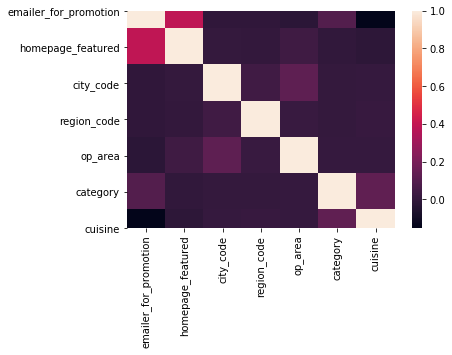

In [98]:
sns.heatmap(xfeatures.corr()) # we plot a heatmap of the xfeatures

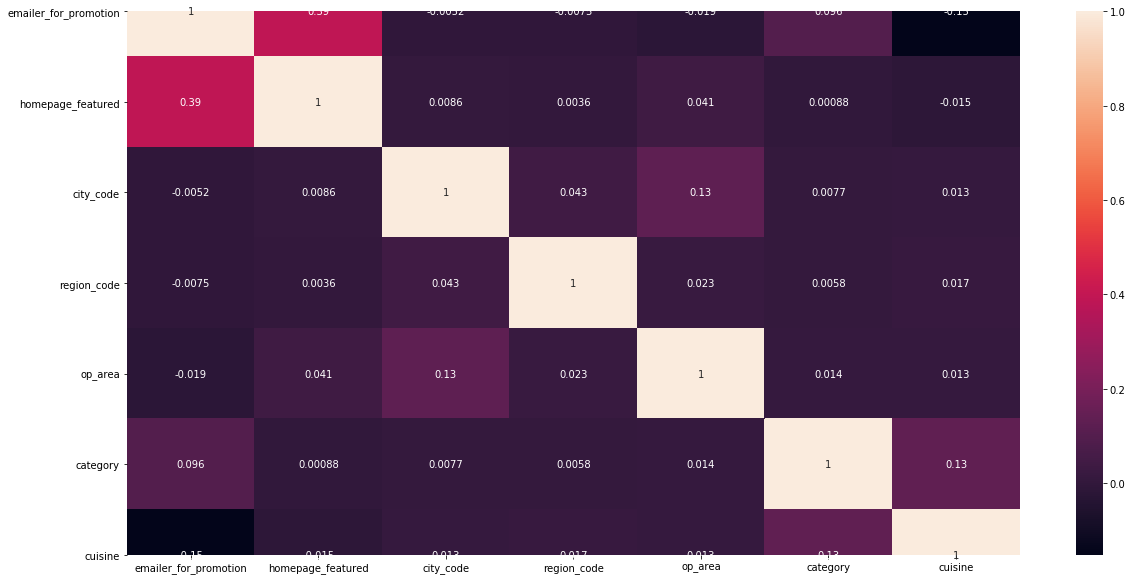

In [99]:
plt.figure(figsize=(20,10))
sns.heatmap(xfeatures.corr(),annot=True)
plt.show()

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor #we import the necessary libraries required for performing prediction

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [102]:
train.columns

Index(['emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [103]:
xfeatures = train[['emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'op_area', 'category', 'cuisine']]
ylabels = train['num_orders']

In [104]:
x_train,x_test,y_train,y_test=train_test_split(xfeatures,ylabels,test_size=0.20,random_state=101)#We now split the data into train and test with test size=20 percent

In [105]:
logreg=LinearRegression() #we First apply Linear Regression to the data

In [106]:
ylabels

0         177
1         323
2          96
3         163
4         215
         ... 
456543     13
456544     42
456545     40
456546     53
456547     27
Name: num_orders, Length: 456546, dtype: int64

In [107]:
logreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
logreg.score(x_test,y_test)

0.17266404611761865

In [109]:
y_pred=logreg.predict(x_test)# we predict the number of orders using Linear Regression
y_pred 

array([239.76259652, 275.61655757, 730.34133425, ..., 134.35269115,
       364.87180899, 838.51965988])

In [110]:
print(list(y_test))

[284, 82, 501, 27, 1310, 285, 109, 53, 55, 391, 69, 109, 175, 107, 998, 82, 42, 297, 446, 2404, 608, 82, 472, 80, 351, 216, 96, 1014, 136, 96, 283, 445, 134, 135, 122, 28, 312, 161, 297, 204, 230, 757, 312, 148, 215, 81, 446, 161, 107, 80, 188, 107, 285, 176, 15, 82, 15, 28, 96, 850, 15, 486, 311, 53, 27, 41, 15, 40, 744, 42, 54, 96, 297, 175, 162, 26, 474, 109, 392, 431, 501, 231, 215, 419, 81, 798, 94, 270, 459, 188, 433, 41, 608, 26, 418, 15, 809, 80, 80, 296, 27, 148, 41, 352, 80, 568, 783, 96, 825, 216, 163, 190, 26, 96, 1095, 499, 163, 15, 42, 298, 82, 190, 136, 108, 243, 26, 189, 514, 107, 122, 15, 176, 15, 487, 41, 136, 2430, 108, 13, 40, 931, 14, 42, 135, 28, 513, 28, 122, 41, 28, 135, 379, 26, 150, 528, 15, 337, 28, 27, 379, 163, 67, 14, 27, 622, 80, 53, 271, 1444, 892, 540, 14, 27, 798, 108, 1662, 28, 26, 40, 68, 123, 1229, 366, 203, 53, 108, 242, 406, 189, 2659, 352, 26, 95, 433, 1066, 836, 460, 81, 15, 636, 433, 54, 55, 1323, 80, 445, 271, 568, 674, 13, 67, 40, 257, 393, 8

In [111]:
x1=x_test.iloc[1]

In [112]:
logreg.predict(np.array(x1).reshape(1,-1))

array([275.61655757])

In [113]:
dt = DecisionTreeRegressor() # We then apply Decision Tree Regression on the data and predict the number of orders using this.
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
y_pred

array([200.0123839 ,  55.35955056, 277.        , ..., 286.23310811,
       632.86254296, 841.0625    ])

In [114]:
dt.score(x_test,y_test)

0.6516933462642358

In [115]:
dt.predict(np.array(x1).reshape(1,-1))

array([55.35955056])

In [116]:
from sklearn.neighbors import KNeighborsRegressor # We then apply KNeighnours Regression on the data

In [117]:
KNN = KNeighborsRegressor() # we predict the number of orders using KNeighours Regression
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
y_pred

array([234.6,  70.8, 216. , ..., 227. , 604.8, 820.4])

In [118]:
KNN.score(x_test,y_test)

0.5975964435743897

In [119]:
KNN.predict(np.array(x1).reshape(1,-1))

array([70.8])

In [128]:
GB = GradientBoostingRegressor() # We then apply Gradient Boosting Regression on the data
GB.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [129]:
y_pred= GB.predict(x_test)# We predict the number of orders using gradient Boosting regression
y_pred

array([ 344.40813327,  114.16334832,  357.26325772, ...,  393.90976584,
        700.936674  , 1480.31652929])

In [130]:
GB.score(x_test,y_test)

0.5496791865050724

In [131]:
GB.predict(np.array(x1).reshape(1,-1))

array([114.16334832])

In [145]:
from lightgbm import LGBMRegressor # We then apply Light GBM Regression to the data

In [146]:
LGBM= LGBMRegressor()

In [147]:
LGBM.fit(x_train, y_train)
y_pred = KNN.predict(x_test) # We predict the number of orders using Light GBM
y_pred

array([234.6,  70.8, 216. , ..., 227. , 604.8, 820.4])

In [148]:
LGBM.score(x_test,y_test)

0.642235997287418

In [149]:
LGBM.predict(np.array(x1).reshape(1,-1))

array([105.31646621])

In [150]:
import joblib # we import joblib

In [134]:
model_file=open("linear_regression_model.pkl","wb")  # We dump the Linear Regression model in a pickle file
joblib.dump(logreg,model_file)
model_file.close()

In [135]:
model_file_knn=open("knn_regression_model.pkl","wb") #We dump the KNeighbours Regression model in a pickle file
joblib.dump(KNN,model_file_knn)
model_file_knn.close()

In [136]:
model_file_dt=open("decisiontree_regression_model.pkl","wb") #We dump the Decision Tree Regression model in a pickle file
joblib.dump(dt,model_file_dt)
model_file_dt.close()

In [137]:
model_file_gb=open("gradientboost_regression_model.pkl","wb")  #We dump the Gradient Boosting Regression model in a pickle file
joblib.dump(GB,model_file_gb)
model_file_gb.close()

In [151]:
model_file_lgbm=open("lgbm_regression_model.pkl","wb") #We dump the Light GBM Regression model in a pickle file
joblib.dump(LGBM,model_file_lgbm)
model_file_lgbm.close()

In [152]:
import warnings
warnings.filterwarnings('ignore')

In [153]:
train.to_csv("clean_dataset.csv",index=False) # We store the cleaned dataset in a csv file to be used in the streamlit app

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [ ]:
wml_credentials= {
  "apikey": "Ms5xGcIWZSnbjiMUPgEIqW1LACoPdRInZB1cKK29boe4",
  "iam_apikey_description": "Auto-generated for key 6055a725-abe5-4282-b0bc-7aec70b47f65",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/fb26dd99696843dbb5db0fb6c301ac09::serviceid:ServiceId-e1d214d8-f50b-48f9-b50c-ac8b2108c132",
  "instance_id": "74d45fcf-e29b-41b8-9a74-6c4958f5a20b",
  "url": "https://us-south.ml.cloud.ibm.com"
}
client=WatsonMachineLearningAPIClient(wml_credentials)

In [ ]:
metadata={
    client.repository.ModelMetaNames.AUTHOR_NAME:"Shreyoshi",
    client.repository.ModelMetaNames.AUTHOR_EMAIL:"shreyoshi754@gmail.com",
    client.repository.ModelMetaNames.NAME:"WarehouseFoodDemandForecasting"
    
}

In [ ]:
stored_data=client.repository.store_model(dt,meta_props=metadata)
stored_data

In [ ]:
guid=client.repository.get_model_uid(stored_data)
guid

In [ ]:
deploy=client.deployments.create(guid)
deploy

In [ ]:
scoring_endpoint=client.deployments.get_scoring_url(deploy)
scoring_endpoint